In [ ]:
import zipfile
import os

# Define the path to the uploaded zip file
zip_path = "/content/drive/MyDrive/sample.zip"
extract_path = "/content/drive/MyDrive"  # Destination folder

# Create the extraction directory if it doesn't exist
os.makedirs(extract_path, exist_ok=True)

# Extract the ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# List the extracted files
extracted_files = os.listdir(extract_path)
print("Extracted Files:", extracted_files)


Extracted Files: ['IMG_20250319_220849722_HDR.jpg', '.ipynb_checkpoints', 'Colab Notebooks', 'khadarbee_shaik.pdf', 'khadarbee_sk_.pdf', 'archive.zip', '149075 (1) (1).docx', 'sample.zip', 'plant village']


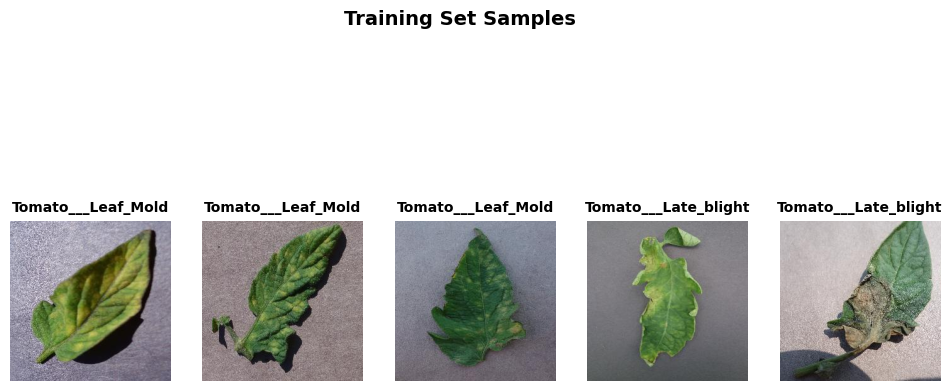

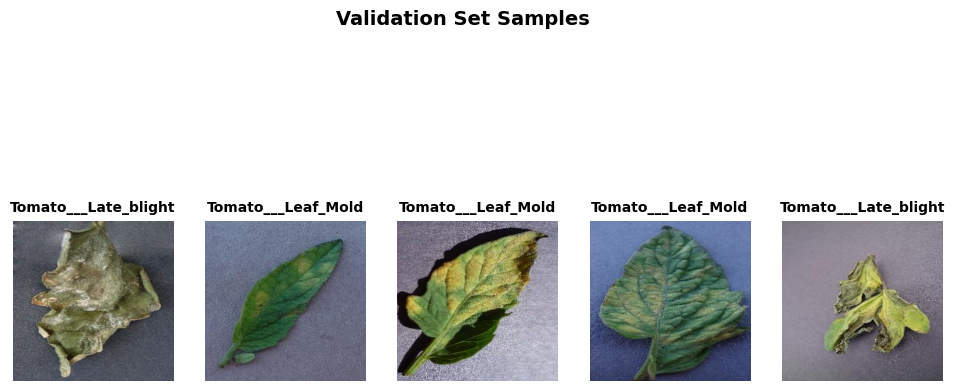

In [ ]:
import os
import matplotlib.pyplot as plt
import random
from PIL import Image

# ✅ Define dataset path
dataset_path = "/content/drive/MyDrive/plant village"  # Update with your dataset path

# ✅ Define train and validation paths
train_folder = os.path.join(dataset_path, "train")
valid_folder = os.path.join(dataset_path, "valid")

# ✅ Function to get random images and labels
def get_sample_images(folder_path, num_samples=5):
    if not os.path.exists(folder_path):
        print(f"❌ Folder not found: {folder_path}")
        return []

    class_folders = [d for d in os.listdir(folder_path) if os.path.isdir(os.path.join(folder_path, d))]
    image_info = []  # List to store (image_path, class_name)

    for _ in range(num_samples):
        random_class = random.choice(class_folders)  # Select a random class
        class_path = os.path.join(folder_path, random_class)
        images = [f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))]

        if images:
            random_image = random.choice(images)  # Select a random image
            image_info.append((os.path.join(class_path, random_image), random_class))

    return image_info  # Returns list of tuples (image_path, class_name)

# ✅ Function to display images with labels
def display_images(image_info, title="Sample Images"):
    if not image_info:
        print(f"❌ No images found in {title}")
        return

    plt.figure(figsize=(12, 6))
    for i, (img_path, class_name) in enumerate(image_info):
        img = Image.open(img_path)
        plt.subplot(1, len(image_info), i + 1)
        plt.imshow(img)
        plt.axis("off")
        plt.title(class_name, fontsize=10, fontweight="bold")  # Display class label

    plt.suptitle(title, fontsize=14, fontweight="bold")
    plt.show()

# ✅ Get and display train images with labels
train_images = get_sample_images(train_folder, num_samples=5)
display_images(train_images, title="Training Set Samples")

# ✅ Get and display validation images with labels
valid_images = get_sample_images(valid_folder, num_samples=5)
display_images(valid_images, title="Validation Set Samples")


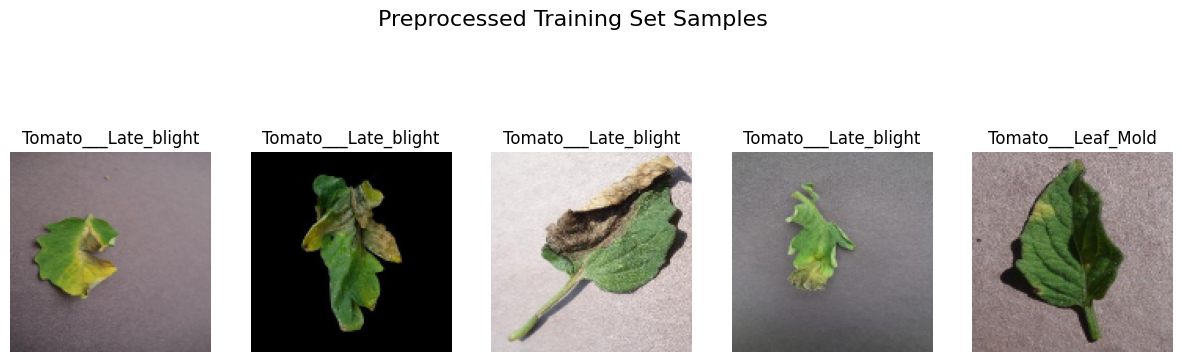

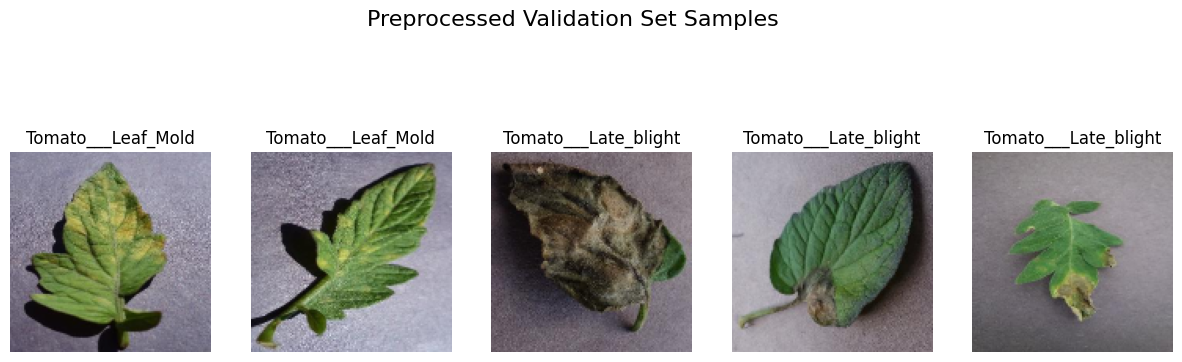

In [ ]:
import os
import cv2
import albumentations as A
from random import sample
import matplotlib.pyplot as plt
from albumentations.pytorch import ToTensorV2
import torch
import numpy as np  # Fix: Import NumPy

# Path to the dataset
dataset_path = '/content/drive/MyDrive/plant village'  # Replace with the actual dataset path
train_folder = os.path.join(dataset_path, 'train')
val_folder = os.path.join(dataset_path, 'valid')

# Define updated preprocessing pipeline
transform = A.Compose([
    A.Resize(128, 128),  # Resize images to 128x128
    A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),  # Normalize (ImageNet standards)
    ToTensorV2()  # Convert to PyTorch tensor
])

# Function to collect image paths and labels from a folder
def load_dataset_from_folder(folder_path):
    image_paths = []
    labels = []
    for label in os.listdir(folder_path):
        label_path = os.path.join(folder_path, label)
        if os.path.isdir(label_path):
            for image in os.listdir(label_path):
                img_path = os.path.join(label_path, image)
                image_paths.append(img_path)
                labels.append(label)
    return image_paths, labels

# Load training and validation datasets
train_paths, train_labels = load_dataset_from_folder(train_folder)
val_paths, val_labels = load_dataset_from_folder(val_folder)

# Apply preprocessing to images (train and validation)
def preprocess_images(image_paths, transform):
    processed_images = []
    for img_path in image_paths:
        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB (matplotlib expects RGB)
        image = transform(image=image)['image']  # Apply the transformation
        processed_images.append(image)
    return processed_images

# Apply transformations (no augmentation)
train_images = preprocess_images(train_paths, transform)
val_images = preprocess_images(val_paths, transform)

# Function to unnormalize and display images
def unnormalize_image(image_tensor):
    mean = torch.tensor([0.485, 0.456, 0.406]).view(1, 1, 3)
    std = torch.tensor([0.229, 0.224, 0.225]).view(1, 1, 3)
    image = image_tensor.permute(1, 2, 0).numpy()  # Convert tensor to numpy (C, H, W) -> (H, W, C)
    image = std.numpy() * image + mean.numpy()  # Undo normalization
    image = np.clip(image, 0, 1)  # Clip values for valid image range
    return image

# Function to display images
def display_images(images, labels, num_images=5, title=""):
    plt.figure(figsize=(15, 5))
    for i in range(num_images):
        image = unnormalize_image(images[i])
        plt.subplot(1, num_images, i + 1)
        plt.imshow(image)
        plt.title(labels[i])
        plt.axis('off')
    plt.suptitle(title, fontsize=16)
    plt.show()

# Display 5 random images from the training set (after preprocessing)
train_indices = sample(range(len(train_paths)), 5)
display_images([train_images[i] for i in train_indices], [train_labels[i] for i in train_indices], title="Preprocessed Training Set Samples")

# Display 5 random images from the validation set (after preprocessing)
val_indices = sample(range(len(val_paths)), 5)
display_images([val_images[i] for i in val_indices], [val_labels[i] for i in val_indices], title="Preprocessed Validation Set Samples")


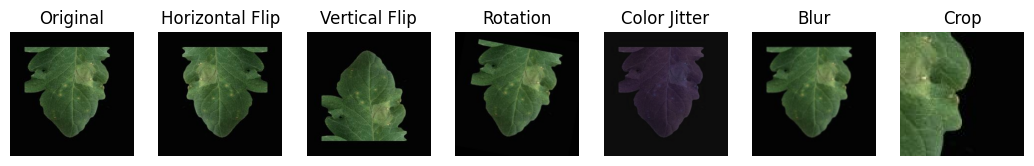

In [ ]:
import os
import cv2
import albumentations as A
import torch
import numpy as np
import matplotlib.pyplot as plt
from albumentations.pytorch import ToTensorV2
from random import choice

# ✅ Define dataset paths
dataset_path = "/content/drive/MyDrive/plant village"
train_folder = os.path.join(dataset_path, "train")

# ✅ Function to load image paths from a folder
def load_dataset_from_folder(folder_path):
    image_paths = []
    labels = []
    for label in os.listdir(folder_path):
        label_path = os.path.join(folder_path, label)
        if os.path.isdir(label_path):
            for image in os.listdir(label_path):
                img_path = os.path.join(label_path, image)
                image_paths.append(img_path)
                labels.append(label)
    return image_paths, labels

# ✅ Load training dataset
train_paths, train_labels = load_dataset_from_folder(train_folder)

# ✅ Define augmentation pipeline
augmentation = A.Compose([
    A.HorizontalFlip(p=1.0),  # Always flip horizontally
    A.VerticalFlip(p=1.0),    # Always flip vertically
    A.Rotate(limit=30, p=1.0),  # Rotate randomly between -30 to +30 degrees
    A.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5, p=1.0),  # Extreme color jitter
    A.GaussianBlur(blur_limit=(3, 5), p=1.0),  # Apply blur
    A.RandomCrop(height=100, width=100, p=1.0),  # Always crop part of the image
    A.Resize(128, 128),  # Resize back to 128x128
    A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),  # Normalize
    ToTensorV2()  # Convert to PyTorch tensor
])

# ✅ Apply augmentations to ALL training images (but store them in a new list)
augmented_train_images = [augmentation(image=cv2.cvtColor(cv2.imread(img), cv2.COLOR_BGR2RGB))['image'] for img in train_paths]

# ✅ Select ONE random image from training set for visualization
sample_image_path = choice(train_paths)
sample_image = cv2.imread(sample_image_path)
sample_image = cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB)  # Convert to RGB

# ✅ Apply all augmentations to this single image
augmented_versions = []
augmentation_names = ["Horizontal Flip", "Vertical Flip", "Rotation", "Color Jitter", "Blur", "Crop"]

for aug in augmentation.transforms[:-2]:  # Apply all except Normalize & ToTensorV2
    transformed = aug(image=sample_image)["image"]
    augmented_versions.append(transformed)

# ✅ Function to display augmented versions of a single image
def display_augmented_versions(original, augmented, names):
    plt.figure(figsize=(15, 5))

    # Show original image
    plt.subplot(1, len(augmented) + 1, 1)
    plt.imshow(original)
    plt.title("Original")
    plt.axis('off')

    # Show augmented versions
    for i, (img, name) in enumerate(zip(augmented, names)):
        plt.subplot(1, len(augmented) + 1, i + 2)
        plt.imshow(img)
        plt.title(name)
        plt.axis('off')

    plt.show()

# ✅ Display all augmentations of the selected image
display_augmented_versions(sample_image, augmented_versions, augmentation_names)


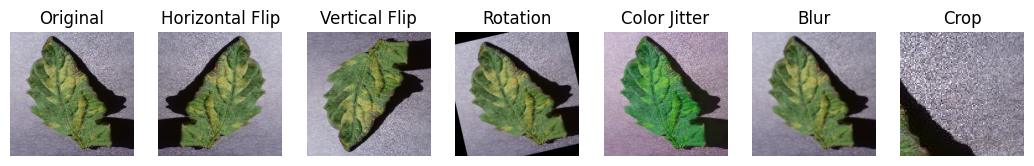

In [ ]:
import os
import cv2
import albumentations as A
import torch
import numpy as np
import matplotlib.pyplot as plt
from albumentations.pytorch import ToTensorV2
from random import choice

# ✅ Define dataset paths
dataset_path = "/content/drive/MyDrive/plant village"
train_folder = os.path.join(dataset_path, "train")

# ✅ Function to load image paths from a folder
def load_dataset_from_folder(folder_path):
    image_paths = []
    labels = []
    for label in os.listdir(folder_path):
        label_path = os.path.join(folder_path, label)
        if os.path.isdir(label_path):
            for image in os.listdir(label_path):
                img_path = os.path.join(label_path, image)
                image_paths.append(img_path)
                labels.append(label)
    return image_paths, labels

# ✅ Load training dataset
train_paths, train_labels = load_dataset_from_folder(train_folder)

# ✅ Define augmentation pipeline
augmentation = A.Compose([
    A.HorizontalFlip(p=1.0),  # Always flip horizontally
    A.VerticalFlip(p=1.0),    # Always flip vertically
    A.Rotate(limit=30, p=1.0),  # Rotate randomly between -30 to +30 degrees
    A.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5, p=1.0),  # Extreme color jitter
    A.GaussianBlur(blur_limit=(3, 5), p=1.0),  # Apply blur
    A.RandomCrop(height=100, width=100, p=1.0),  # Always crop part of the image
    A.Resize(128, 128),  # Resize back to 128x128
    A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),  # Normalize
    ToTensorV2()  # Convert to PyTorch tensor
])

# ✅ Apply augmentations to ALL training images (but store them in a new list)
augmented_train_images = [augmentation(image=cv2.cvtColor(cv2.imread(img), cv2.COLOR_BGR2RGB))['image'] for img in train_paths]

# ✅ Select ONE random image from training set for visualization
sample_image_path = choice(train_paths)
sample_image = cv2.imread(sample_image_path)
sample_image = cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB)  # Convert to RGB

# ✅ Apply all augmentations to this single image
augmented_versions = []
augmentation_names = ["Horizontal Flip", "Vertical Flip", "Rotation", "Color Jitter", "Blur", "Crop"]

for aug in augmentation.transforms[:-2]:  # Apply all except Normalize & ToTensorV2
    transformed = aug(image=sample_image)["image"]
    augmented_versions.append(transformed)

# ✅ Function to display augmented versions of a single image
def display_augmented_versions(original, augmented, names):
    plt.figure(figsize=(15, 5))

    # Show original image
    plt.subplot(1, len(augmented) + 1, 1)
    plt.imshow(original)
    plt.title("Original")
    plt.axis('off')

    # Show augmented versions
    for i, (img, name) in enumerate(zip(augmented, names)):
        plt.subplot(1, len(augmented) + 1, i + 2)
        plt.imshow(img)
        plt.title(name)
        plt.axis('off')

    plt.show()

# ✅ Display all augmentations of the selected image
display_augmented_versions(sample_image, augmented_versions, augmentation_names)
